In [72]:
import pandas as pd

df = pd.read_pickle('data_merged.pkl')
df.head()

,text,date,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length
0,Sehr geehrter Herr Alterspräsident! So muss ...,2021-10-26,Gabriele Katzmarek,female,None,SPD,[(Beifall bei der SPD sowie bei Abgeordneten d...,SP-2021-0,1299,2593
1,Herr Präsident! Liebe Kolleginnen und Kolleg...,2021-10-26,Stefan Müller,male,None,CDU/CSU,[(Beifall bei der CDU/CSU sowie bei Abgeordnet...,SP-2021-1,4028,3796
2,Sehr geehrter Herr Alterspräsident Wolfgang ...,2021-10-26,Britta Haßelmann,female,None,BÜNDNIS 90/DIE GRÜNEN,[(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei d...,SP-2021-2,451,4301
3,Sehr geehrter Herr Präsident! Meine lieben K...,2021-10-26,Marco Buschmann,male,None,FDP,"[(Jan Korte [DIE LINKE]: Oder Jugendweihe!), (...",SP-2021-3,3083,4555
4,Herr Alterspräsident! Lassen Sie mich zunäch...,2021-10-26,Stephan Brandner,male,None,AfD,"[(Beifall bei der AfD), (Beifall bei Abgeordne...",SP-2021-4,4055,5996


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971264 entries, 0 to 971279
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   text            971264 non-null  object        
 1   date            971264 non-null  datetime64[ns]
 2   speaker_name    971264 non-null  object        
 3   speaker_gender  971264 non-null  object        
 4   speaker_role    884850 non-null  object        
 5   speaker_party   969563 non-null  object        
 6   comments        971264 non-null  object        
 7   id              971264 non-null  object        
 8   speaker_id      971264 non-null  int64         
 9   speech_length   971264 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 81.5+ MB


In [74]:
df["speaker_party"].value_counts() # speeches done by speaker parties
df.groupby('speaker_party')['speaker_id'].nunique() # unique speaker parties

speaker_party
AfD                                                            112
BHE|CDU                                                          2
BP                                                              22
BÜNDNIS 90/DIE\n                                    GRÜNEN       1
BÜNDNIS 90/DIE\n                                GRÜNEN          23
BÜNDNIS 90/DIE\n                            GRÜNEN              12
BÜNDNIS 90/DIE\n                        GRÜNEN                  12
BÜNDNIS 90/DIE\n                    GRÜNEN                      28
BÜNDNIS 90/DIE GRÜNEN                                          113
CDU                                                           1399
CDU oder parteilos                                               1
CDU/CSU                                                        196
CSU                                                            312
DIE\n                                LINKE                       7
DIE\n                        LINKE              

In [75]:
df["speaker_role"].value_counts() # speeches done by speaker roles
df.groupby('speaker_role')['speaker_id'].nunique() # unique speaker roles

speaker_role
Alterspräsident                                                                                                        11
Alterspräsidentin                                                                                                       1
Bayerischer Staatsminister für Wirtschaft                                                                               1
Beauftragte der Bundesregierung für\n                                    Menschenrechtspolitik und humanitäre Hilfe     1
Beauftragte der Bundesregierung für Ausländerfragen                                                                     1
                                                                                                                       ..
Vîzepräsident                                                                                                           1
Wehrbeauftragte des Deutschen Bundestages                                                                               1
Wehrbeauftr

In [76]:
df["speaker_gender"].value_counts() # speeches by male vs. female speakers

male      743700
female    227564
Name: speaker_gender, dtype: int64

In [77]:
# get unique male vs. female speakers
gender_counts = df.groupby('speaker_gender')['speaker_id'].nunique()
gender_counts

speaker_gender
female    1057
male      3656
Name: speaker_id, dtype: int64

In [78]:
df["speaker_id"].nunique() # unqiue speakers

4713

In [79]:
df["speaker_name"].nunique() # unqiue speakers

4713

In [80]:
#df.drop(df[df['speaker_gender'] == 'unknown'].index, inplace=True)
df["speaker_gender"].value_counts() # speeches by male vs. female speakers

male      743700
female    227564
Name: speaker_gender, dtype: int64

## Redeanteile Frauen vs. Männer

### Nach Anzahl der Reden

In [81]:
# speech count by gender
gender_speech_counts = df['speaker_gender'].value_counts()

# ratio of speeches by each gender
total_speeches = len(df)
speech_ratio = gender_speech_counts / total_speeches

speech_ratio

male      0.765703
female    0.234297
Name: speaker_gender, dtype: float64

### Nach Länge der Reden insgesamt

In [82]:
# Calculate the total length of speeches by each gender (number of characters)
gender_speech_lengths = df.groupby('speaker_gender')['speech_length'].sum()

# Calculate the ratio of speech lengths by each gender
total_speech_length = gender_speech_lengths.sum()
speech_length_ratio = gender_speech_lengths / total_speech_length

speech_length_ratio

speaker_gender
female    0.215681
male      0.784319
Name: speech_length, dtype: float64

In [83]:
import matplotlib.pyplot as plt

In [84]:
gender_summary = df.groupby('speaker_gender')['speech_length'].describe()
gender_summary

,count,mean,std,min,25%,50%,75%,max
speaker_gender,,,,,,,,
female,227564.0,1472.501683,2972.160760,1.0,57.0,182.0,1303.0,124673.0
male,743700.0,1638.487966,3638.972701,0.0,70.0,312.0,1294.0,352221.0


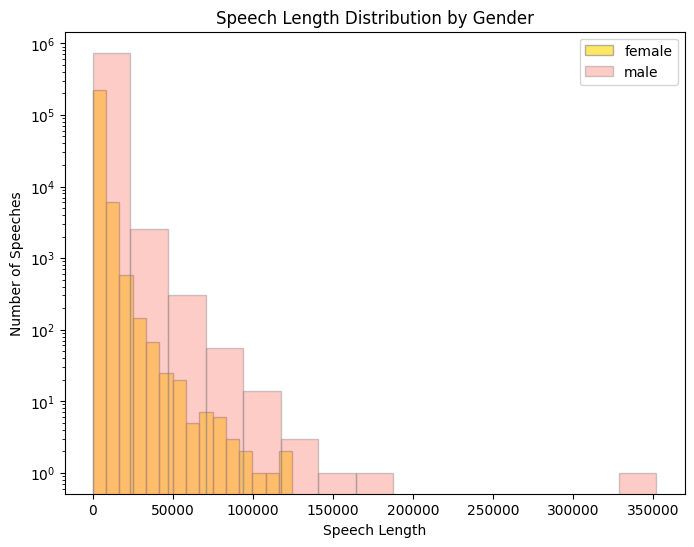

In [85]:
plt.figure(figsize=(8, 6))

colors = {'male': 'salmon', 'female': 'gold'}
alphas = {'male': 0.4, 'female': 0.6}

for gender in gender_summary.index:
    plt.hist(
        df[df['speaker_gender'] == gender]['speech_length'], 
        bins=15, 
        alpha=alphas[gender], 
        label=gender,
        log=True,
        color=colors[gender],
        edgecolor='grey'
    )

plt.title('Speech Length Distribution by Gender')
plt.xlabel('Speech Length')
plt.ylabel('Number of Speeches') # within length range
plt.legend()
plt.show()